In [3]:
#  DEVELOPING A FLIGHT DELAY PREDICTION USING ML

import sys
import numpy as np #Linear Algebra
import pandas as pd #Data Processing 
import seaborn as sns #Data Visualizaton
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder #LabelEncoding From Sklearn
from sklearn.preprocessing import OneHotEncoder #One-Hot Encoding From Sklearn
from sklearn.model_selection import train_test_split #Split Data in Train & Test Array
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier #ML Algorithm
from sklearn.metrics import accuracy_score #Calculate Accuracy Score 
import sklearn.metrics as metrics #Confusion Matrix
from matplotlib import pyplot as plt

In [5]:
# IMPORT THE DATASET

dataset = pd.read_csv("flight data.csv")
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [6]:
# ANALYZE THE DATA

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [7]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [8]:
# HANDLING THE MISSING VALUES

dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [9]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

Text(0.5, 1.0, 'Scatter plot between ARR_DELAY and ARR_DEL15')

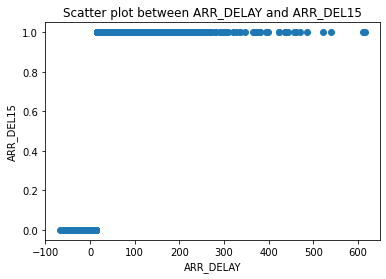

In [10]:
plt.scatter(dataset['ARR_DELAY'],dataset['ARR_DEL15'])
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.title('Scatter plot between ARR_DELAY and ARR_DEL15')

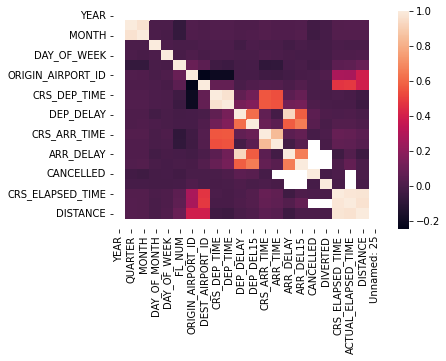

In [11]:
sns.heatmap(dataset.corr())

In [15]:
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [16]:
# DROPPING UNNCESSARY BUILDING

ataset = dataset[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]] 
dataset.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [17]:
dataset=dataset.fillna({'ARR_DEL15': 1})
dataset=dataset.fillna({'DEP_DEL15': 0})
dataset.iloc[177:185]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
177,2016,1,1,9,6,DL,N3743H,2834,13487,MSP,...,0.0,852,1151.0,NaN,1.0,0.0,1.0,231.0,NaN,1399.0
178,2016,1,1,9,6,DL,N975AT,2839,11433,DTW,...,0.0,1724,1709.0,-15.0,0.0,0.0,0.0,117.0,106.0,509.0
179,2016,1,1,10,7,DL,N924DN,86,13487,MSP,...,0.0,1632,NaN,NaN,1.0,1.0,0.0,104.0,NaN,528.0
180,2016,1,1,10,7,DL,N671DN,87,11433,DTW,...,1.0,1649,1703.0,14.0,0.0,0.0,0.0,129.0,119.0,528.0
181,2016,1,1,10,7,DL,N319NB,423,12478,JFK,...,0.0,1600,1607.0,7.0,0.0,0.0,0.0,155.0,151.0,760.0
182,2016,1,1,10,7,DL,N587NW,440,12478,JFK,...,0.0,849,835.0,-14.0,0.0,0.0,0.0,159.0,146.0,760.0
183,2016,1,1,10,7,DL,N813DN,485,12478,JFK,...,1.0,1945,1955.0,10.0,0.0,0.0,0.0,390.0,335.0,2422.0
184,2016,1,1,10,7,DL,N922DX,557,13487,MSP,...,0.0,912,1500.0,NaN,1.0,0.0,1.0,107.0,NaN,528.0


In [18]:
import math
for index, row in dataset.iterrows():
    dataset.loc[index,'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME']/100)
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,0.0,21,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,0.0,14,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,0.0,12,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,0.0,13,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,0.0,6,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [19]:
# LABEL ENCODING & ONE HOT ENCODING

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset ['DEST'])
dataset['ORIGIN'] = le.fit_transform(dataset ['ORIGIN'])

In [20]:
dataset.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,2016,1,1,1,5,DL,N836DN,1399,10397,0,...,0.0,21,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,2016,1,1,1,5,DL,N964DN,1476,11433,1,...,0.0,14,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,2016,1,1,1,5,DL,N813DN,1597,10397,0,...,0.0,12,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,2016,1,1,1,5,DL,N587NW,1768,14747,4,...,0.0,13,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,2016,1,1,1,5,DL,N836DN,1823,14747,4,...,0.0,6,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [21]:
x=dataset.iloc[:,0:16].values
y=dataset.iloc[:,8:9].values

In [22]:
from sklearn.preprocessing import OneHotEncoder
oh=OneHotEncoder()
z=oh.fit_transform(x[:,4:5]).toarray()
t=oh.fit_transform(x[:,5:6]).toarray()

In [24]:
z

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [25]:
t

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [26]:
# Splitting The Dataset Into Dependent And Independent Variables

dataset = pd.get_dummies(dataset, columns=['ORIGIN','DEST'])
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,...,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,2016,1,1,1,5,DL,N836DN,1399,10397,14747,...,1,0,0,0,0,0,0,0,0,1
1,2016,1,1,1,5,DL,N964DN,1476,11433,13487,...,0,1,0,0,0,0,0,0,1,0
2,2016,1,1,1,5,DL,N813DN,1597,10397,14747,...,1,0,0,0,0,0,0,0,0,1
3,2016,1,1,1,5,DL,N587NW,1768,14747,13487,...,0,0,0,0,1,0,0,0,1,0
4,2016,1,1,1,5,DL,N836DN,1823,14747,11433,...,0,0,0,0,1,0,1,0,0,0


In [27]:
# Split the dataset into Train set and Test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_test.shape

(2247, 16)

In [29]:
x_train.shape

(8984, 16)

In [30]:
y_test.shape

(2247, 1)

In [31]:
y_train.shape

(8984, 1)